IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np

READING THE TRAINING DATA & TESTING DATA

In [2]:
df_train = pd.read_csv('Digit_Recognition_Training_Data.csv')
df_test  = pd.read_csv('Digit_Recognition_Testing_Data.csv')

df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


SPLITTING THE TRAINING DATA INTO X & Y

In [4]:
x = df_train.drop(columns = ['label'], axis = 1)
y = df_train['label']

x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

SCALING THE X & TESTING DATA USING MIN_MAX_SCALER

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

x1 = np.array(df_test)

x  = sc.fit_transform(x)
x1 = sc.fit_transform(x1)

x  = np.reshape(a = x,  newshape = (42000, 28, 28, 1))
x1 = np.reshape(a = x1, newshape = (28000, 28, 28, 1))

ENCODING THE Y DATA USING ONE_HOT_ENCODER

In [13]:
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder(sparse_output = False)

y  = np.array(y)
y  = np.reshape(a = y, newshape = (-1, 1))

y  = en.fit_transform(y)

SPLITTING THE DATA USING TRAIN_TEST_SPLIT

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_tran, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

IMPORTING LIBRARIES

In [ ]:
import matplotlib.pyplot as mp

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

CREATING A SEQUENTIAL MODEL

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'Same', activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'Same', activation = 'relu'))

model.add(MaxPool2D(pool_size = (2, 2), strides = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 10, activation = 'softmax'))

COMPILING THE MODEL

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

TRAINING THE MODEL ON THE TRAINING DATA

In [15]:
history = model.fit(x, y, batch_size = 64, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
657/657 [==============================] - 304s 458ms/step - loss: 0.2214 - accuracy: 0.9289 - val_loss: 0.0597 - val_accuracy: 0.9817
Epoch 2/10
657/657 [==============================] - 281s 428ms/step - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.0322 - val_accuracy: 0.9902
Epoch 3/10
657/657 [==============================] - 307s 467ms/step - loss: 0.0499 - accuracy: 0.9854 - val_loss: 0.0278 - val_accuracy: 0.9919
Epoch 4/10
657/657 [==============================] - 287s 437ms/step - loss: 0.0454 - accuracy: 0.9865 - val_loss: 0.0202 - val_accuracy: 0.9936
Epoch 5/10
657/657 [==============================] - 240s 365ms/step - loss: 0.0377 - accuracy: 0.9888 - val_loss: 0.0109 - val_accuracy: 0.9964
Epoch 6/10
657/657 [==============================] - 235s 357ms/step - loss: 0.0322 - accuracy: 0.9905 - val_loss: 0.0153 - val_accuracy: 0.9954
Epoch 7/10
657/657 [==============================] - 236s 359ms/step - loss: 0.0294 - accuracy: 0.9909 - val_loss: 0.0076 -

VISUALIZING THE LOSS & ACCURACY VIA PLOTS

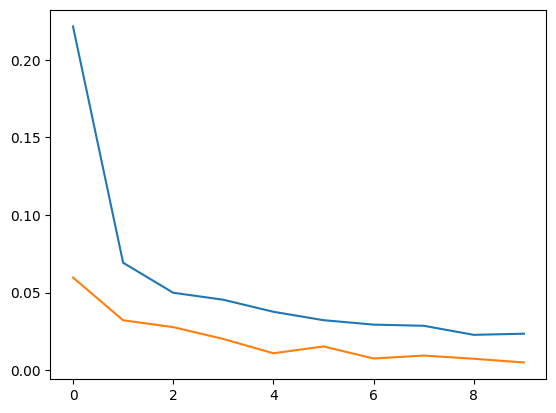

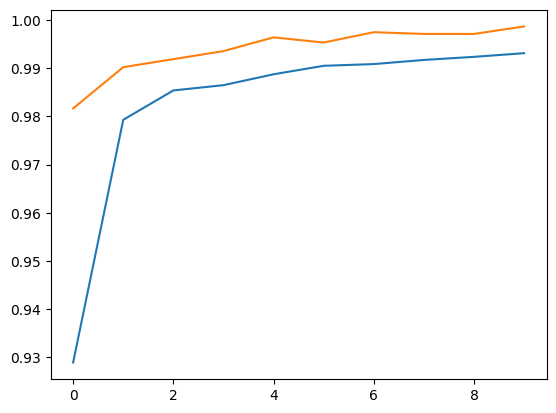

In [18]:
mp.plot(history.history['loss'])
mp.plot(history.history['val_loss'])
mp.show()

mp.plot(history.history['accuracy'])
mp.plot(history.history['val_accuracy'])
mp.show()

PREDICTING ON THE TESTING DATA

In [19]:
y_predict = model.predict(x1)
y_predict = y_predict.argmax(axis = -1)

875/875 [==============================] - 40s 45ms/step


CONVERTING THE PREDICTIONS INTO A DATA FRAME

In [ ]:
y_predict = pd.Series(y_predict, name = 'label')
y_predict = pd.concat([pd.Series(range(1, 28001), name = 'id'), y_predict], axis = 1)

y_predict.head()